# Capítulo 14 - Introdução à análise estatística com Statsmodel

Problema de negócio que será trabalhado: Existe alguma relação entre a área de imóveis (em m²) e o valor do aluguel em determinada cidade? Caso exista relação, como podemos mensurá-la?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Carregando os Dados

In [4]:
df = pd.read_csv('dataset_cap14.csv')

In [6]:
df.shape

(3000, 7)

In [9]:
df.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [12]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [21]:
# Convertendo variáveis de código em string

df['codigo_localidade'] = df['codigo_localidade'].astype('str')
df['codigo_bairro'] = df['codigo_bairro'].astype('str')
df.dtypes

valor_aluguel        float64
area_m2                int64
ano_construcao         int64
codigo_localidade     object
numero_banheiros       int64
numero_cozinhas        int64
codigo_bairro         object
dtype: object

## Análise exploratória - Resumo estatístico

In [22]:
# Verificando se há valores ausentes

df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [23]:
df.describe()

,valor_aluguel,area_m2,ano_construcao,numero_banheiros,numero_cozinhas
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,0.061333,0.042000
std,195.865692,23.675758,22.288136,0.239981,0.200623
min,40.512820,20.000000,1918.000000,0.000000,0.000000
25%,320.961530,51.000000,1939.000000,0.000000,0.000000
50%,426.897435,65.000000,1959.000000,0.000000,0.000000
75%,560.282055,81.000000,1972.000000,0.000000,0.000000
max,1843.384600,160.000000,1997.000000,1.000000,1.000000


In [24]:
# Resumo estatístico da variável alvo
df['valor_aluguel'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

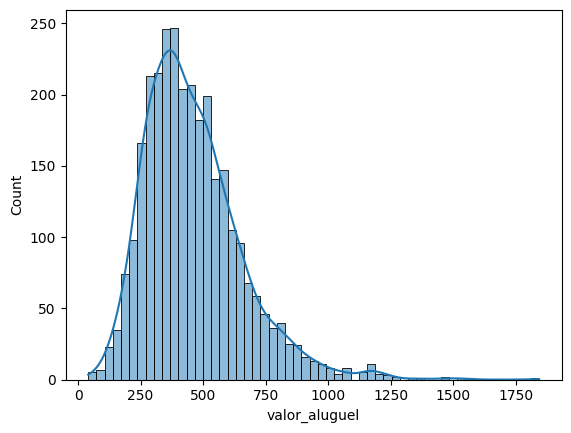

In [27]:
# Histograma da variável alvo

sns.histplot(data = df, x = 'valor_aluguel', kde='True')

In [28]:
# Matriz de correlação entre variáveis
df.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

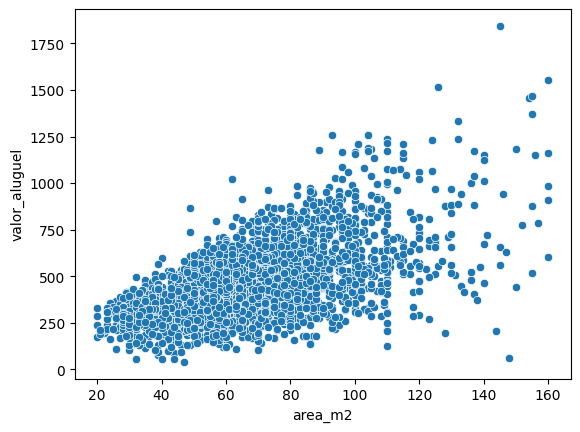

In [32]:
# Como a correlação entre valor_aluguel e area_m2 é a maior de todas com a variável-alvo, ela vai ser a variável explicativa
# Análise da relação entre variável-alvo e variável explicativa com um scatterplot:

sns.scatterplot(data=df,x='area_m2',y='valor_aluguel')

## Regressão linear simples

### Construção do Modelo OLS (Ordinary Least Square) com Statsmodels em Python

In [33]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [35]:
# Definindo variável dependente/de saída
y = df['valor_aluguel']

# Definindo variável independente/de entrada
x = df['area_m2']

In [36]:
# Pelo Statsmodels, é preciso acrescentar uma constante à(s) variável(eis) de entrada
x = sm.add_constant(x)

In [37]:
# Criando o modelo
modelo = sm.OLS(y,x)

In [39]:
# Treinando o modelo
resultado = modelo.fit()

In [40]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          6.84e-275
Time:                        15:32:48   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

### Intepretando a tabela

- P ajuda a identificar o nível de significância da variável
  - Quando P é menor que o nível de significância (geralmente, 0,05), a variável tem significância estatística
- R² é o coeficiente de determinação; quanto maior, mais fácil explicar a variável-alvo
  - Ele vai de 0 a 1

<function matplotlib.pyplot.show(close=None, block=None)>

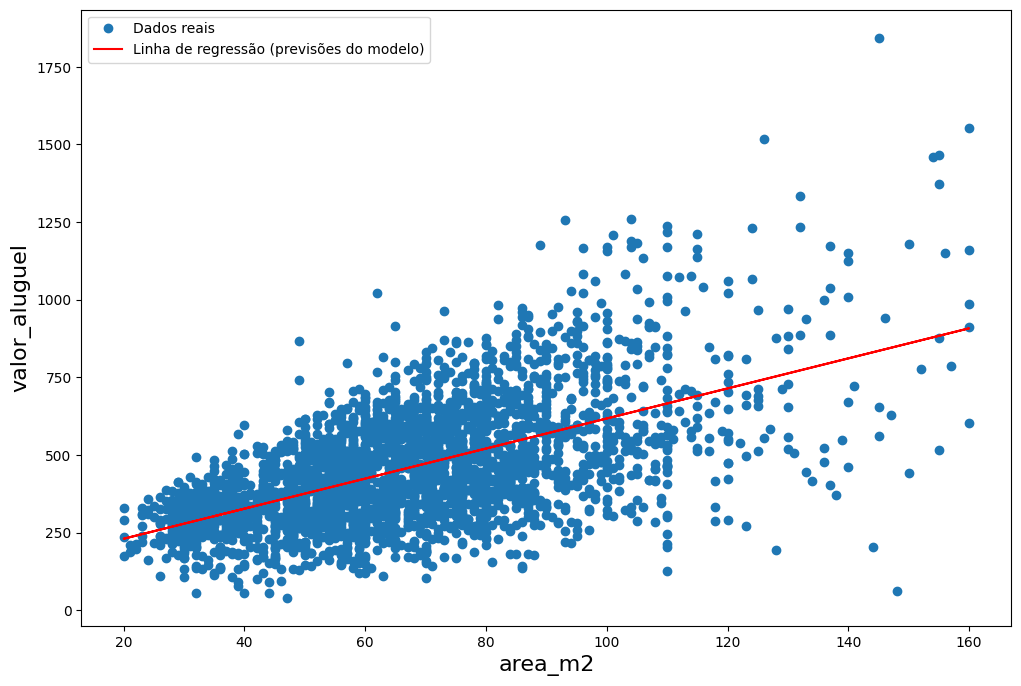

In [53]:
plt.figure(figsize=(12,8))
plt.xlabel('area_m2', size = 16)
plt.ylabel('valor_aluguel', size = 16)
plt.plot(x['area_m2'],y,'o',label = 'Dados reais')
plt.plot(x['area_m2'],resultado.fittedvalues,'r-',label='Linha de regressão (previsões do modelo)')
plt.legend(loc='best')
plt.show

## Conclusão

Existe forte relação entre a área (em m²) e o valor do aluguel. Porém, apenas a área não explica completamente a variação no aluguel, pois o modelo obteve um coeficiente de determinação (R²) de 0,34.

O ideal seria usar mais variáveis de entrada para construir o modelo e compreender se outros fatores também influenciam o valor do aluguel.